## Import Libraries and Data

In [13]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/PhD_MasterDataset_OT_initial_Jan.csv', firstRow=72, lastRow=78)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_260123_S73-78.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse water addition

In [25]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=176s and ended at t=580s; mass=44.4604g
This equals a volume of 44.549m; expected was 44.95mL; error is 0.891%


## Analyise surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


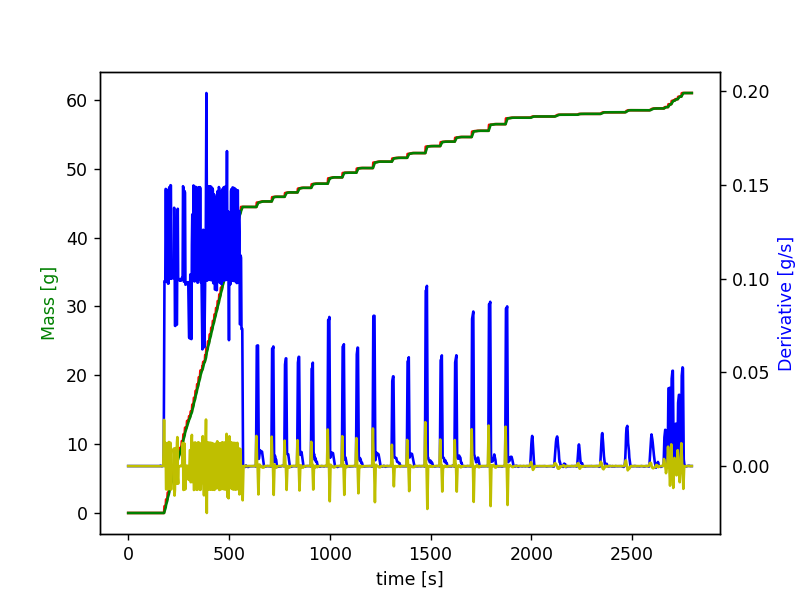

Addition of 0.795g Plantapon LC 7 detected from 580s to 678s - expected volume = 0.923mL and actual volume = 0.757mL (resulting error is 18.062%)
Addition of 0.681g Plantapon LC 7 detected from 708s to 742s - expected volume = 0.504mL and actual volume = 0.647mL (resulting error is 28.509%)
Addition of 0.636g Plantapon LC 7 detected from 772s to 806s - expected volume = 0.504mL and actual volume = 0.605mL (resulting error is 20.057%)
Addition of 0.67g Plantapon LC 7 detected from 836s to 874s - expected volume = 0.542mL and actual volume = 0.637mL (resulting error is 17.526%)
Addition of 0.606g Plantapon LC 7 detected from 904s to 944s - expected volume = 0.542mL and actual volume = 0.576mL (resulting error is 6.298%)
Addition of 0.921g Plantapon LC 7 detected from 986s to 1030s - expected volume = 0.873mL and actual volume = 0.874mL (resulting error is 0.152%)
Addition of 0.684g Plantapon LC 7 detected from 1058s to 1090s - expected volume = 0.57mL and actual volume = 0.651mL (resulti

In [26]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


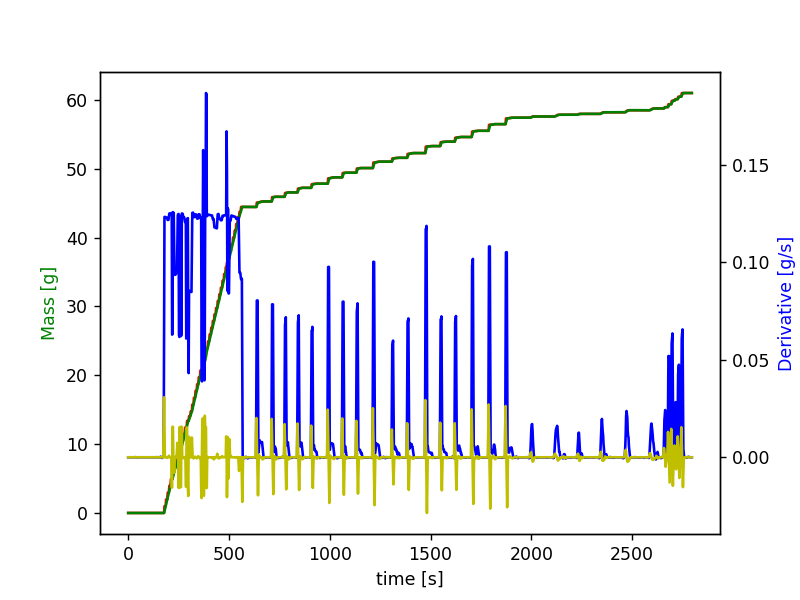

Addition of 0.181g Luviquat Excellence detected from 1990s to 2018s - expected volume = 0.191mL and actual volume = 0.165mL (resulting error is 13.869%)
Addition of 0.264g Luviquat Excellence detected from 2110s to 2148s - expected volume = 0.236mL and actual volume = 0.24mL (resulting error is 1.587%)
Erroneously detected peak from 2156s to 2172s - but detected mass change was smaller than defined minimum of 0.01 g
Addition of 0.127g Luviquat Excellence detected from 2224s to 2258s - expected volume = 0.109mL and actual volume = 0.116mL (resulting error is 6.042%)
Addition of 0.235g Luviquat Excellence detected from 2338s to 2378s - expected volume = 0.209mL and actual volume = 0.213mL (resulting error is 2.011%)
Addition of 0.305g Luviquat Excellence detected from 2460s to 2494s - expected volume = 0.273mL and actual volume = 0.277mL (resulting error is 1.542%)
Addition of 0.273g Luviquat Excellence detected from 2582s to 2634s - expected volume = 0.245mL and actual volume = 0.248mL 

In [27]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=6, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0011250000000000001 g/s^2


<IPython.core.display.Javascript object>


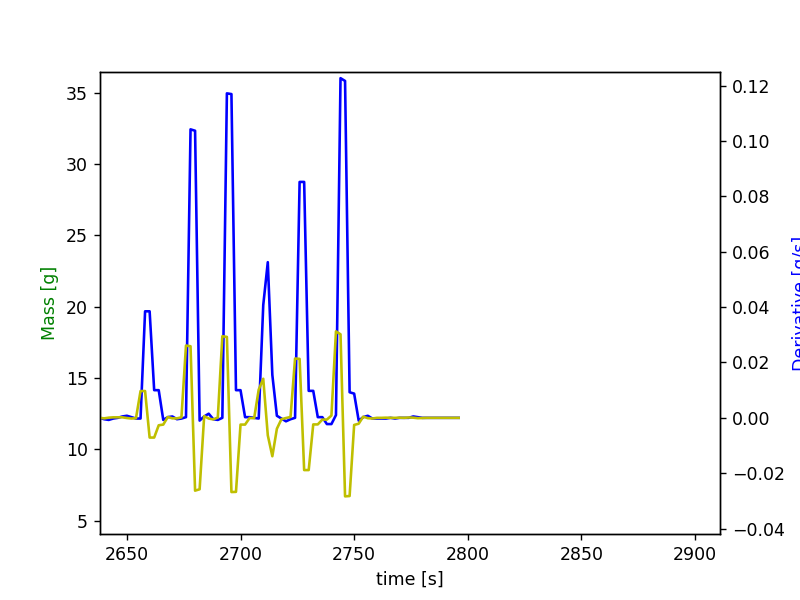

Addition of 0.194g Arlypon TT detected from 2654s to 2670s - expected volume = 0.2mL and actual volume = 0.203mL (resulting error is 1.842%)
Addition of 0.417g Arlypon TT detected from 2674s to 2686s - expected volume = 0.44mL and actual volume = 0.437mL (resulting error is 0.714%)
Addition of 0.507g Arlypon TT detected from 2690s to 2706s - expected volume = 0.493mL and actual volume = 0.531mL (resulting error is 7.872%)
Addition of 0.223g Arlypon TT detected from 2706s to 2720s - expected volume = 0.157mL and actual volume = 0.234mL (resulting error is 49.0%)
Addition of 0.373g Arlypon TT detected from 2722s to 2738s - expected volume = 0.367mL and actual volume = 0.391mL (resulting error is 6.571%)
Addition of 0.518g Arlypon TT detected from 2740s to 2756s - expected volume = 0.523mL and actual volume = 0.542mL (resulting error is 3.6%)


In [28]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=9, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [29]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_S73-S78.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_16168\3028940542.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
72,73.0,0.0,0.0,7.990986,0.0,12.560568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.818533,0.0,0.0,0.0,0.0,1.945465
73,74.0,0.0,0.0,12.680122,0.0,9.810876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.542233,0.0,0.0,0.0,0.0,4.013671
74,75.0,0.0,0.0,12.138035,0.0,12.578536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210664,0.0,0.0,0.0,0.0,4.823627
75,76.0,0.0,0.0,9.009281,0.0,8.878259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.294121,0.0,0.0,0.0,0.0,2.185342
76,77.0,0.0,0.0,13.112978,0.0,9.278132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.932204,0.0,0.0,0.0,0.0,3.590355
77,78.0,0.0,0.0,9.163456,0.0,9.223233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.677697,0.0,0.0,0.0,0.0,5.076110
